# **Assignment 4: Support Vector Machine (SVM) and Model Ensemble**

This assignment aims at familiarizing you with training and testing Suppor Vector Machine classification model, along with exploiting the power of model ensemble technics. The dataset you will be working on is **'data-breast-cancer.csv'**. It is composed of attributes to build a prediction model.

In [346]:
# Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [347]:
# Load the dataset
df = pd.read_csv("data-breast-cancer.csv")

In [348]:
# Show some data samples
df.head()

,Unnamed: 0,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


This is a dataset used to detect whether a patient has breast cancer depending on the following features:

- diagnosis: (label) the diagnosis of breast (label) tissues (M = malignant, B = benign).
- radius: distances from center to points on the perimeter.
- texture: standard deviation of gray-scale values.
- perimeter: perimeter of the tumor.
- area: area of the tumor.
- smoothness: local variation in radius lengths.
- compactness: is equal to (perimeter^2 / area - 1.0).
- concavity: severity of concave portions of the contour.
- concave points: number of concave portions of the contour.
- symmetry: symmetry of the tumor shape.
- fractal dimension: "coastline approximation" - 1.



## **Data analysis & preprocessing**

### **1. Check if missing values are existed**

In [349]:
df = df.drop("Unnamed: 0", axis = 1)

In [350]:
df.shape

(569, 11)

In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    float64
 6   compactness_mean        569 non-null    float64
 7   concavity_mean          569 non-null    float64
 8   concave points_mean     569 non-null    float64
 9   symmetry_mean           569 non-null    float64
 10  fractal_dimension_mean  569 non-null    float64
dtypes: float64(10), object(1)
memory usage: 49.0+ KB


In [352]:
df.isnull().sum()

diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
dtype: int64

From the dataframe, 2 information can be noticed are: \\
1. There is no missing value.
2. There are 1 categorical feature ('diagnosis') and 10 numerical features (the others).

In [353]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


In [354]:
df.describe(include=[object])

,diagnosis
count,569
unique,2
top,B
freq,357


### **2. Encoder categorical features**

In [355]:
from sklearn.preprocessing import LabelEncoder

In [356]:
categorical_f = [col for col in df.columns if df[col].dtypes=="object"]

In [357]:
# Encoder
encoder = LabelEncoder()

for i in categorical_f:
  df[i] = encoder.fit_transform(df[i])

In [358]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


### **3. Boxplot and Heatmap**



<Axes: >

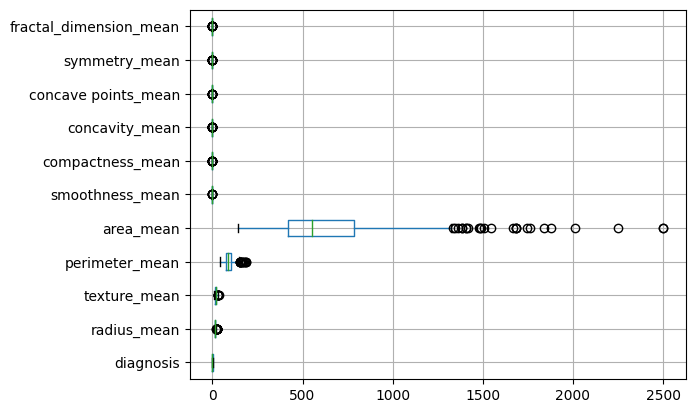

In [359]:
# Box plot
df.boxplot(vert= False)

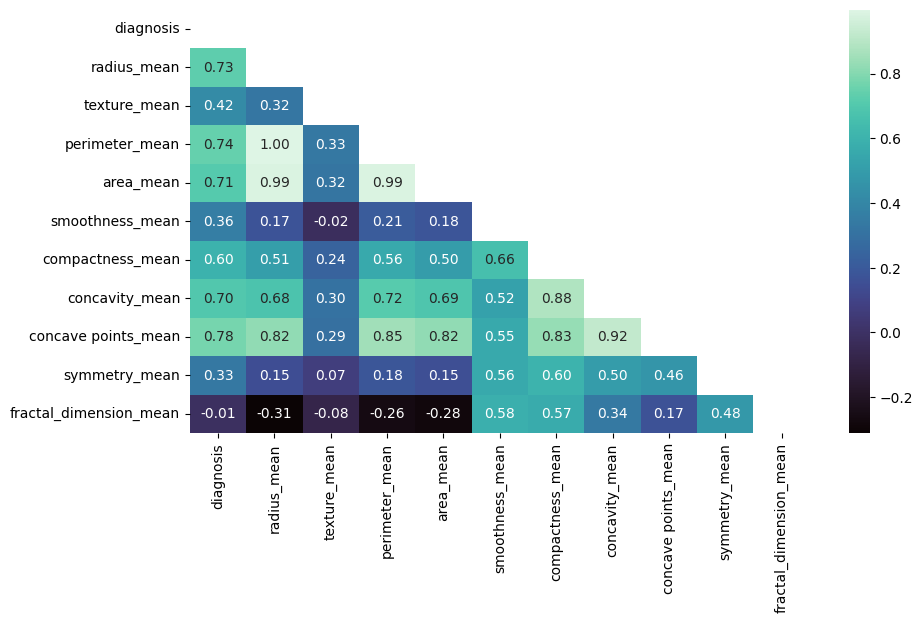

In [360]:
# Heat map
lt = np.triu(df.corr())

fig = plt.figure(figsize=(10,5.5))

sns.heatmap(df.corr(), annot = True, cbar = 'True', mask = lt, fmt='.2f', cmap= "mako");

With the small dataset (569 data points), removing outliers or features, in this case, will lead to missing more information and be able to make the model(s) more biased or not general in certain ways.

## **Training**

In [361]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [362]:
x = df.drop("diagnosis", axis = 1)
y = df["diagnosis"]

In [363]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=23, train_size=0.75)

In [364]:
print(np.unique(y_train, return_counts=True))

(array([0, 1]), array([262, 164]))


We have:
*   Target label 0: 262 data points
*   Target label 1: 164 data points \\

Given that the difference between label 1 and label 0 is acceptable, the application of SMOTE is not required in this particular instance.

To have all features on a same scale to prevent dominating:

In [365]:
scaler = StandardScaler()
x_normalized_train = scaler.fit_transform(x_train)
x_normalized_test = scaler.transform(x_test)

### **1. SVM**

In [366]:
from sklearn.svm import SVC

In [367]:
svm_params = {'C': [0.1, 1, 10, 50, 100, 120, 150, 200, 500, 1000],
              'gamma': [1, 0.1, 0.05, 0.02, 0.01, 0.001]}

gridsearch_svm = GridSearchCV(estimator=SVC(random_state = 101), param_grid=svm_params, verbose = 1, cv = 20)

In [368]:
gridsearch_svm.fit(x_normalized_train, y_train)

Fitting 20 folds for each of 60 candidates, totalling 1200 fits


GridSearchCV(cv=20, estimator=SVC(random_state=101),
             param_grid={'C': [0.1, 1, 10, 50, 100, 120, 150, 200, 500, 1000],
                         'gamma': [1, 0.1, 0.05, 0.02, 0.01, 0.001]},
             verbose=1)

In [369]:
gridsearch_svm.best_params_

{'C': 50, 'gamma': 0.01}

In [370]:
gridsearch_svm.best_score_

0.9554112554112555

In [371]:
svm_model = SVC(C = gridsearch_svm.best_params_['C'],
                gamma = gridsearch_svm.best_params_['gamma'],
                random_state = 101)

In [372]:
svm_model.fit(x_normalized_train, y_train)

SVC(C=50, gamma=0.01, random_state=101)

In [373]:
pred_y_svm = svm_model.predict(x_normalized_test)

In [374]:
print(classification_report(y_test,pred_y_svm))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        95
           1       0.96      0.92      0.94        48

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



### **2. Other classifiers**

#### **Logistic Regression**

In [375]:
#import lib for model
from sklearn.linear_model import LogisticRegression

In [376]:
logreg_params ={"C": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

gridsearch_logreg = GridSearchCV(LogisticRegression(), logreg_params, cv = 10)

In [377]:
gridsearch_logreg.fit(x_normalized_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [378]:
gridsearch_logreg.best_params_

{'C': 2}

In [379]:
gridsearch_logreg.best_score_

0.9390365448504984

In [380]:
logreg_model = LogisticRegression(C = gridsearch_logreg.best_params_["C"])

In [381]:
logreg_model.fit(x_normalized_train, y_train)

LogisticRegression(C=2)

In [382]:
pred_y_log = logreg_model.predict(x_normalized_test)

In [383]:
print(classification_report(y_test,pred_y_log))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        95
           1       0.92      0.92      0.92        48

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



#### **Gaussian Naive Bayes**

In [384]:
#import lib for model
from sklearn.naive_bayes import GaussianNB

In [385]:
gaussianNB_params ={"var_smoothing": [0.01, 1, 0.1, 0.5, 1.5, 0, 2, 3, 4, 5, 6, 10]}

gridsearch_gnb = GridSearchCV(GaussianNB(), gaussianNB_params, cv = 10)

In [386]:
gridsearch_gnb.fit(x_normalized_train, y_train)

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': [0.01, 1, 0.1, 0.5, 1.5, 0, 2, 3, 4,
                                           5, 6, 10]})

In [387]:
gridsearch_gnb.best_params_

{'var_smoothing': 0.1}

In [388]:
gridsearch_gnb.best_score_

0.906312292358804

In [389]:
gnb_model = GaussianNB(var_smoothing=gridsearch_gnb.best_params_["var_smoothing"])

In [390]:
gnb_model.fit(x_normalized_train, y_train)

GaussianNB(var_smoothing=0.1)

In [391]:
pred_y_gnb = gnb_model.predict(x_normalized_test)

In [392]:
print(classification_report(y_test,pred_y_gnb))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        95
           1       0.96      0.90      0.92        48

    accuracy                           0.95       143
   macro avg       0.95      0.94      0.94       143
weighted avg       0.95      0.95      0.95       143



#### **Decision Tree**

In [393]:
from sklearn.tree import DecisionTreeClassifier

In [394]:
dt_params = {"criterion": ["gini", "entropy"],
             "max_depth": [i for i in range (3,10)],
             "min_samples_split": [i for i in range (3,9)]}

gridsearch_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state = 101), param_grid=dt_params, cv=10)

In [395]:
gridsearch_dt.fit(x_normalized_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=101),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [3, 4, 5, 6, 7, 8]})

In [396]:
gridsearch_dt.best_params_

{'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 3}

In [397]:
gridsearch_dt.best_score_

0.9249169435215947

In [398]:
dt_model = DecisionTreeClassifier(criterion=gridsearch_dt.best_params_['criterion'],
                                  random_state = 101,
                                  max_depth=gridsearch_dt.best_params_['max_depth'],
                                  min_samples_split=gridsearch_dt.best_params_['min_samples_split'])

In [399]:
dt_model.fit(x_normalized_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=3, random_state=101)

In [400]:
pred_y_dt = dt_model.predict(x_normalized_test)

In [401]:
print(classification_report(y_test,pred_y_dt))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        95
           1       0.98      0.85      0.91        48

    accuracy                           0.94       143
   macro avg       0.95      0.92      0.94       143
weighted avg       0.95      0.94      0.94       143



#### **Random Forest**

In [402]:
from sklearn.ensemble import RandomForestClassifier

In [403]:
rf_params = {"criterion": ["gini", "entropy"],
             "max_depth": [7, 9, 11],
             "min_samples_split": [8, 12, 16, 20]}

gridsearch_rf = GridSearchCV(estimator=RandomForestClassifier(n_estimators=10, n_jobs=10, random_state = 101), param_grid=rf_params, cv= 10)

In [404]:
gridsearch_rf.fit(x_normalized_train, y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=10, n_jobs=10,
                                              random_state=101),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [7, 9, 11],
                         'min_samples_split': [8, 12, 16, 20]})

In [405]:
gridsearch_rf.best_params_

{'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 12}

In [406]:
gridsearch_rf.best_score_

0.9250830564784055

In [407]:
rf_model = RandomForestClassifier(n_estimators=10,
                                  random_state=101,
                                  criterion=gridsearch_rf.best_params_['criterion'],
                                  max_depth=gridsearch_rf.best_params_['max_depth'],
                                  min_samples_split=gridsearch_rf.best_params_['min_samples_split'])

In [408]:
rf_model.fit(x_normalized_train, y_train)

RandomForestClassifier(max_depth=9, min_samples_split=12, n_estimators=10,
                       random_state=101)

In [409]:
pred_y_rf = rf_model.predict(x_normalized_test)

In [410]:
print(classification_report(y_test,pred_y_rf))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        95
           1       0.96      0.92      0.94        48

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



### **3. Comparing other 4 classifiers with SVM**

In [455]:
compare = {"Model Name": ["SVM", "Logistic Regression", "Gaussian Naive Bayes", "Decision Tree", "Random Forest"],
           "Accuracy": [accuracy_score(y_test,pred_y_svm), accuracy_score(y_test,pred_y_log), accuracy_score(y_test,pred_y_gnb),
                        accuracy_score(y_test,pred_y_dt), accuracy_score(y_test,pred_y_rf)],
           "FN": [confusion_matrix(y_test,pred_y_svm)[1][0], confusion_matrix(y_test,pred_y_log)[1][0], confusion_matrix(y_test,pred_y_gnb)[1][0],
                        confusion_matrix(y_test,pred_y_dt)[1][0], confusion_matrix(y_test,pred_y_rf)[1][0]]
           }
model_compare = pd.DataFrame(compare)

In [456]:
model_compare

,Model Name,Accuracy,FN
0,SVM,0.958042,4
1,Logistic Regression,0.944056,4
2,Gaussian Naive Bayes,0.951049,5
3,Decision Tree,0.944056,7
4,Random Forest,0.958042,4


<Axes: xlabel='Model Name'>

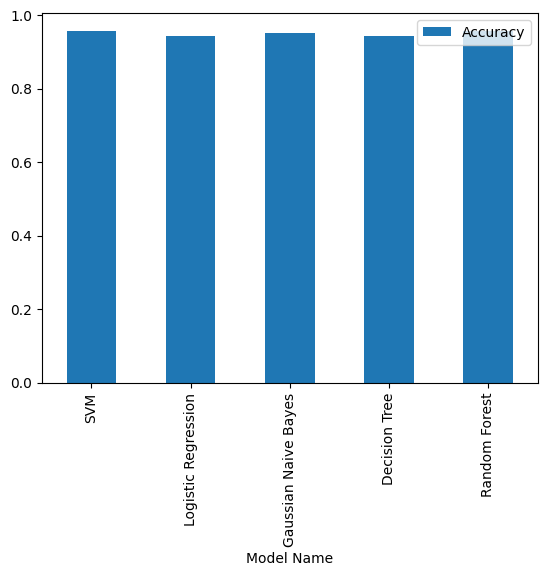

In [457]:
model_compare.plot.bar(x ="Model Name", y = "Accuracy")

<Axes: xlabel='Model Name'>

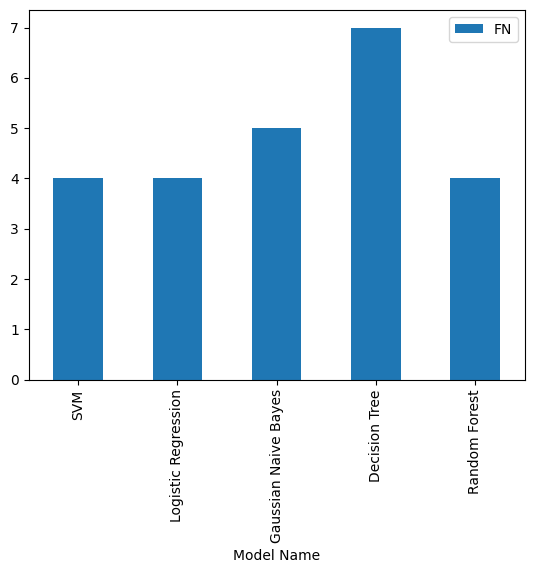

In [458]:
model_compare.plot.bar(x ="Model Name", y = "FN")

Among 5 models, SVM and Random Forest have the highest accuracy - 96%, followed by Gaussian Naive Bayes - 95% and Logistic Regression, Decision Tree with 94%. Therefore, the 2 best models among those are SVM and Random Forest.

### **4. Ensemble**

In [445]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

#### **Bagging with SVM**

In [415]:
base_svm = SVC(kernel='rbf',
               C=1.0,
               random_state = 101)

In [416]:
bagging_model = BaggingClassifier(estimator=base_svm,
                                  n_estimators=10,
                                  max_samples=0.5,
                                  random_state = 101)

In [417]:
bagging_model.fit(x_normalized_train, y_train)

BaggingClassifier(estimator=SVC(random_state=101), max_samples=0.5,
                  random_state=101)

In [418]:
pred_y_bagging = bagging_model.predict(x_normalized_test)

In [419]:
print(classification_report(y_test, pred_y_bagging))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        95
           1       0.96      0.92      0.94        48

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



#### **Boosting with AdaBoost, Gradient Boosting and XGBoost**

**AdaBoost**

In [420]:
ada_model = AdaBoostClassifier(estimator = DecisionTreeClassifier(random_state=101,
                                                                  criterion = 'gini',
                                                                  max_depth = 6,
                                                                  min_samples_split = 3),
                               n_estimators=10)

In [421]:
ada_model.fit(x_normalized_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=6,
                                                    min_samples_split=3,
                                                    random_state=101),
                   n_estimators=10)

In [422]:
pred_y_ada = ada_model.predict(x_normalized_test)

In [423]:
print(classification_report(y_test, pred_y_ada))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        95
           1       0.98      0.90      0.93        48

    accuracy                           0.96       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.96      0.96      0.96       143



**Gradient Boosting**

In [424]:
gb_model = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1)

In [425]:
gb_model.fit(x_normalized_train, y_train)

GradientBoostingClassifier(n_estimators=10)

In [426]:
pred_y_gb = gb_model.predict(x_normalized_test)

In [427]:
print(classification_report(y_test, pred_y_gb))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        95
           1       0.98      0.90      0.93        48

    accuracy                           0.96       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.96      0.96      0.96       143



**XGBoost**

In [428]:
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1)

In [429]:
xgb_model.fit(x_normalized_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [430]:
pred_y_xgb = xgb_model.predict(x_normalized_test)

In [431]:
print(classification_report(y_test, pred_y_xgb))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        95
           1       0.98      0.96      0.97        48

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



#### **Stacking**

In [432]:
estimators= [
    ('dt', dt_model),
    ('svm', svm_model),
    ('rf', rf_model),
]

stacking_model = StackingClassifier(estimators=estimators, final_estimator=rf_model, cv = 20)

In [433]:
stacking_model.fit(x_normalized_train, y_train)

StackingClassifier(cv=20,
                   estimators=[('dt',
                                DecisionTreeClassifier(max_depth=6,
                                                       min_samples_split=3,
                                                       random_state=101)),
                               ('svm', SVC(C=50, gamma=0.01, random_state=101)),
                               ('rf',
                                RandomForestClassifier(max_depth=9,
                                                       min_samples_split=12,
                                                       n_estimators=10,
                                                       random_state=101))],
                   final_estimator=RandomForestClassifier(max_depth=9,
                                                          min_samples_split=12,
                                                          n_estimators=10,
                                                          random_state=101))

In [434]:
pred_y_stacking = stacking_model.predict(x_normalized_test)

In [435]:
print(classification_report(y_test, pred_y_stacking))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        95
           1       0.98      0.92      0.95        48

    accuracy                           0.97       143
   macro avg       0.97      0.95      0.96       143
weighted avg       0.97      0.97      0.96       143



### **5. Confusion Matrix of 10 models**

#### Confusion Matrix of ***SVM*** on test set and whole dataset:

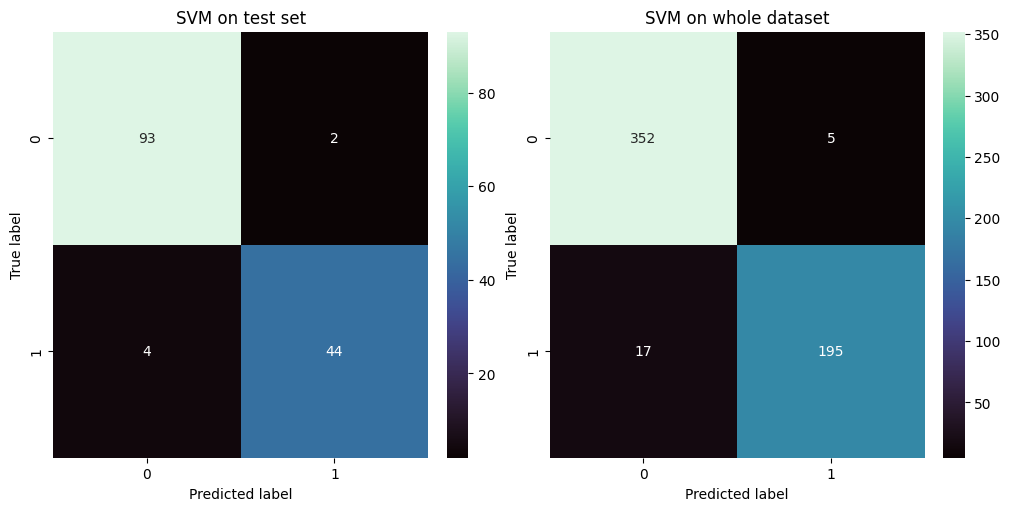

In [436]:
fig, ax =  plt.subplots(1, 2, constrained_layout=True, figsize=(10, 5))

c_matrix_svm_test = confusion_matrix(y_test, pred_y_svm)

# create the whole dataset which is in new order after randoming in the spliting part
pred_y_svm_train = svm_model.predict(x_normalized_train)
pred_y_svm_all = pred_y_svm_train
y_all = pd.concat([y_train, y_test])

for i in range (len(pred_y_svm)):
  pred_y_svm_all = np.append(pred_y_svm_all, pred_y_svm[i])

c_matrix_svm_all = confusion_matrix(y_all, pred_y_svm_all)

#plot
sns.heatmap(c_matrix_svm_test, annot=True, fmt='d', cmap = "mako", ax=ax[0])
ax[0].set_title('SVM on test set')
ax[0].set_ylabel('True label')
ax[0].set_xlabel('Predicted label')

sns.heatmap(c_matrix_svm_all, annot=True, fmt='d', cmap = "mako", ax=ax[1])
ax[1].set_title('SVM on whole dataset')
ax[1].set_ylabel('True label')
ax[1].set_xlabel('Predicted label')

plt.show()

#### Confusion Matrix of ***Logistic Regression*** on test set and whole dataset:

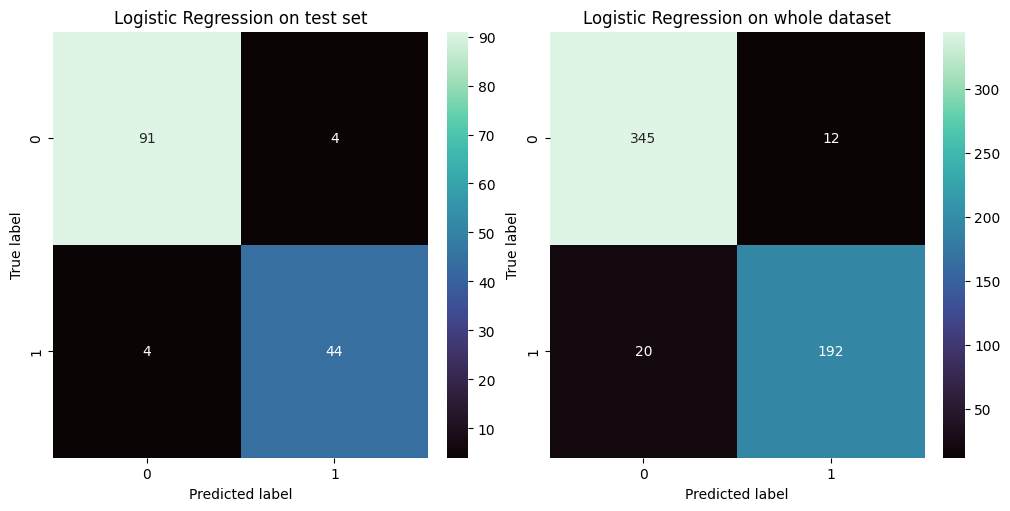

In [437]:
fig, ax =  plt.subplots(1, 2, constrained_layout=True, figsize=(10, 5))

c_matrix_log_test = confusion_matrix(y_test, pred_y_log)

# create the whole dataset which is in new order after randoming in the spliting part
pred_y_log_train = logreg_model.predict(x_normalized_train)
pred_y_log_all = pred_y_log_train
y_all = pd.concat([y_train, y_test])

for i in range (len(pred_y_svm)):
  pred_y_log_all = np.append(pred_y_log_all, pred_y_log[i])

c_matrix_log_all = confusion_matrix(y_all, pred_y_log_all)

#plot
sns.heatmap(c_matrix_log_test, annot=True, fmt='d', cmap = "mako", ax=ax[0])
ax[0].set_title('Logistic Regression on test set')
ax[0].set_ylabel('True label')
ax[0].set_xlabel('Predicted label')

sns.heatmap(c_matrix_log_all, annot=True, fmt='d', cmap = "mako", ax=ax[1])
ax[1].set_title('Logistic Regression on whole dataset')
ax[1].set_ylabel('True label')
ax[1].set_xlabel('Predicted label')

plt.show()

#### Confusion Matrix of ***Gaussian Naive Bayes*** on test set and whole dataset:

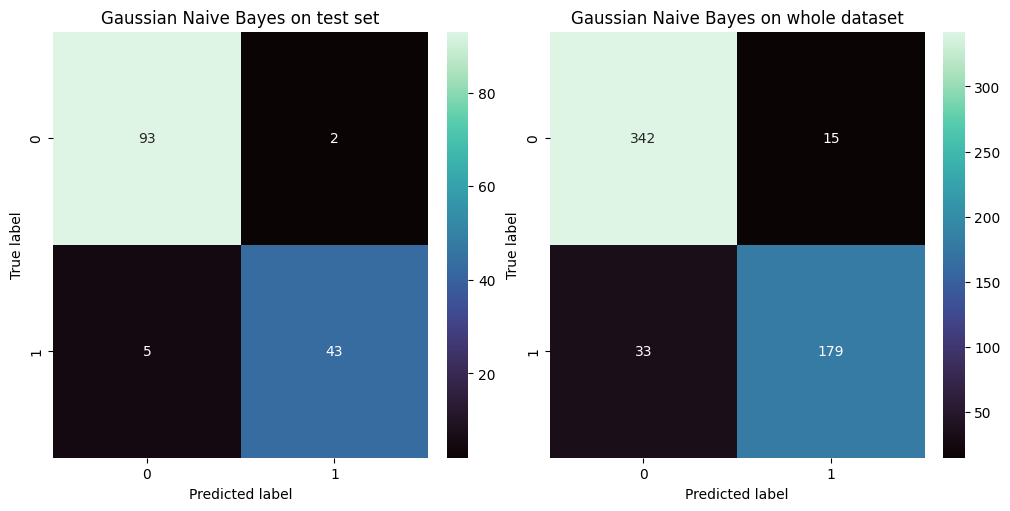

In [438]:
fig, ax =  plt.subplots(1, 2, constrained_layout=True, figsize=(10, 5))

c_matrix_gnb_test = confusion_matrix(y_test, pred_y_gnb)

# create the whole dataset which is in new order after randoming in the spliting part
pred_y_gnb_train = gnb_model.predict(x_normalized_train)
pred_y_gnb_all = pred_y_gnb_train
y_all = pd.concat([y_train, y_test])

for i in range (len(pred_y_svm)):
  pred_y_gnb_all = np.append(pred_y_gnb_all, pred_y_gnb[i])

c_matrix_gnb_all = confusion_matrix(y_all, pred_y_gnb_all)

#plot
sns.heatmap(c_matrix_gnb_test, annot=True, fmt='d', cmap = "mako", ax=ax[0])
ax[0].set_title('Gaussian Naive Bayes on test set')
ax[0].set_ylabel('True label')
ax[0].set_xlabel('Predicted label')

sns.heatmap(c_matrix_gnb_all, annot=True, fmt='d', cmap = "mako", ax=ax[1])
ax[1].set_title('Gaussian Naive Bayes on whole dataset')
ax[1].set_ylabel('True label')
ax[1].set_xlabel('Predicted label')

plt.show()

#### Confusion Matrix of ***Decision Tree*** on test set and whole dataset:

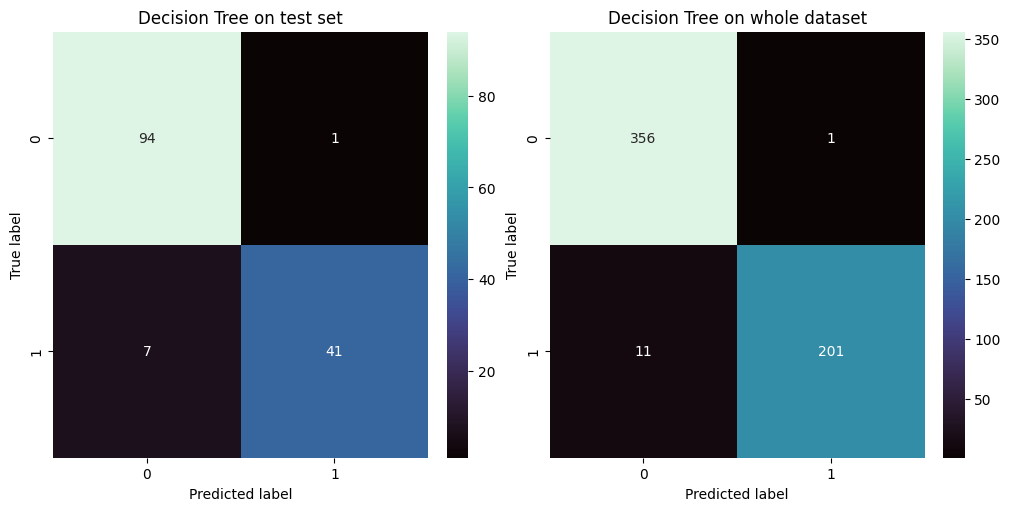

In [439]:
fig, ax =  plt.subplots(1, 2, constrained_layout=True, figsize=(10, 5))

c_matrix_dt_test = confusion_matrix(y_test, pred_y_dt)

# create the whole dataset which is in new order after randoming in the spliting part
pred_y_dt_train = dt_model.predict(x_normalized_train)
pred_y_dt_all = pred_y_dt_train
y_all = pd.concat([y_train, y_test])

for i in range (len(pred_y_svm)):
  pred_y_dt_all = np.append(pred_y_dt_all, pred_y_dt[i])

c_matrix_dt_all = confusion_matrix(y_all, pred_y_dt_all)

#plot
sns.heatmap(c_matrix_dt_test, annot=True, fmt='d', cmap = "mako", ax=ax[0])
ax[0].set_title('Decision Tree on test set')
ax[0].set_ylabel('True label')
ax[0].set_xlabel('Predicted label')

sns.heatmap(c_matrix_dt_all, annot=True, fmt='d', cmap = "mako", ax=ax[1])
ax[1].set_title('Decision Tree on whole dataset')
ax[1].set_ylabel('True label')
ax[1].set_xlabel('Predicted label')

plt.show()

#### Confusion Matrix of ***Random Forest*** on test set and whole dataset:

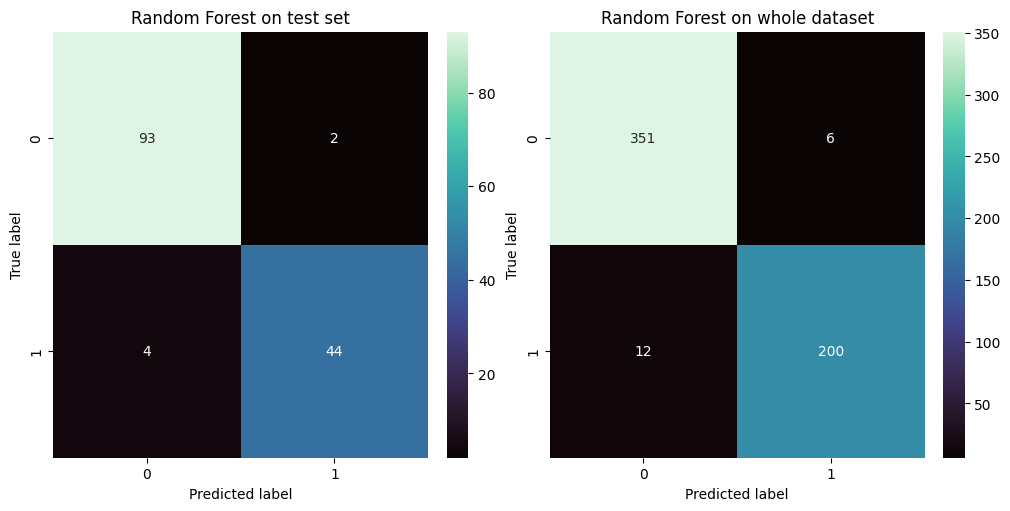

In [440]:
fig, ax =  plt.subplots(1, 2, constrained_layout=True, figsize=(10, 5))

c_matrix_rf_test = confusion_matrix(y_test, pred_y_rf)

# create the whole dataset which is in new order after randoming in the spliting part
pred_y_rf_train = rf_model.predict(x_normalized_train)
pred_y_rf_all = pred_y_rf_train
y_all = pd.concat([y_train, y_test])

for i in range (len(pred_y_svm)):
  pred_y_rf_all = np.append(pred_y_rf_all, pred_y_rf[i])

c_matrix_rf_all = confusion_matrix(y_all, pred_y_rf_all)

#plot
sns.heatmap(c_matrix_rf_test, annot=True, fmt='d', cmap = "mako", ax=ax[0])
ax[0].set_title('Random Forest on test set')
ax[0].set_ylabel('True label')
ax[0].set_xlabel('Predicted label')

sns.heatmap(c_matrix_rf_all, annot=True, fmt='d', cmap = "mako", ax=ax[1])
ax[1].set_title('Random Forest on whole dataset')
ax[1].set_ylabel('True label')
ax[1].set_xlabel('Predicted label')

plt.show()

#### Confusion Matrix of ***Ensemble - Bagging on SVM*** on test set and whole dataset:

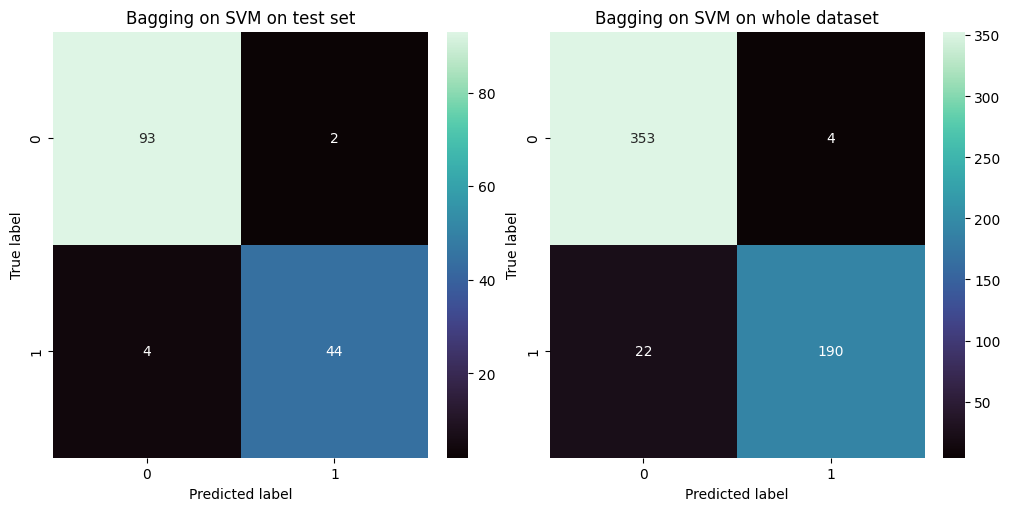

In [446]:
fig, ax =  plt.subplots(1, 2, constrained_layout=True, figsize=(10, 5))

c_matrix_bagging_test = confusion_matrix(y_test, pred_y_bagging)

# create the whole dataset which is in new order after randoming in the spliting part
pred_y_bagging_train = bagging_model.predict(x_normalized_train)
pred_y_bagging_all = pred_y_bagging_train
y_all = pd.concat([y_train, y_test])

for i in range (len(pred_y_svm)):
  pred_y_bagging_all = np.append(pred_y_bagging_all, pred_y_bagging[i])

c_matrix_bagging_all = confusion_matrix(y_all, pred_y_bagging_all)

#plot
sns.heatmap(c_matrix_bagging_test, annot=True, fmt='d', cmap = "mako", ax=ax[0])
ax[0].set_title('Bagging on SVM on test set')
ax[0].set_ylabel('True label')
ax[0].set_xlabel('Predicted label')

sns.heatmap(c_matrix_bagging_all, annot=True, fmt='d', cmap = "mako", ax=ax[1])
ax[1].set_title('Bagging on SVM on whole dataset')
ax[1].set_ylabel('True label')
ax[1].set_xlabel('Predicted label')

plt.show()

#### Confusion Matrix of ***Ensemble - AdaBoost*** on test set and whole dataset:

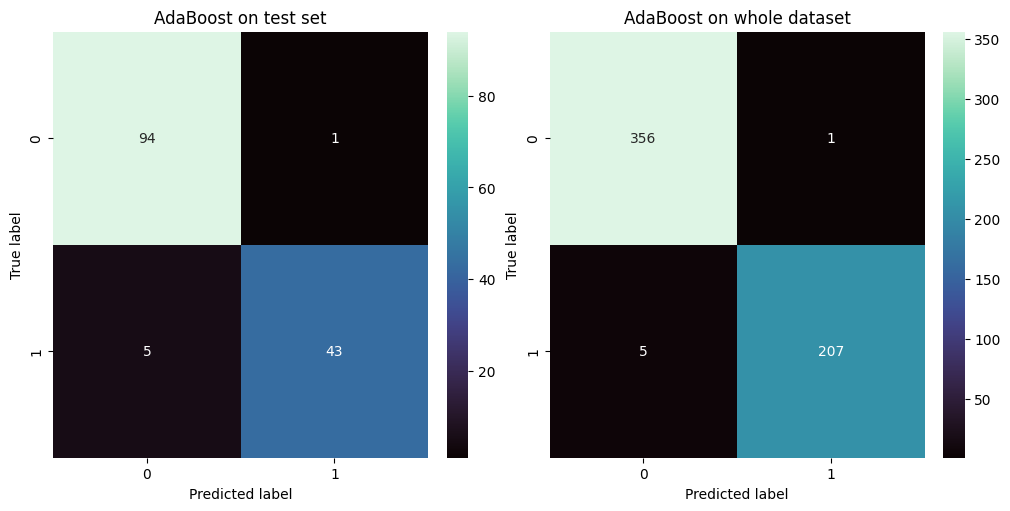

In [447]:
fig, ax =  plt.subplots(1, 2, constrained_layout=True, figsize=(10, 5))

c_matrix_ada_test = confusion_matrix(y_test, pred_y_ada)

# create the whole dataset which is in new order after randoming in the spliting part
pred_y_ada_train = ada_model.predict(x_normalized_train)
pred_y_ada_all = pred_y_ada_train
y_all = pd.concat([y_train, y_test])

for i in range (len(pred_y_svm)):
  pred_y_ada_all = np.append(pred_y_ada_all, pred_y_ada[i])

c_matrix_ada_all = confusion_matrix(y_all, pred_y_ada_all)

#plot
sns.heatmap(c_matrix_ada_test, annot=True, fmt='d', cmap = "mako", ax=ax[0])
ax[0].set_title('AdaBoost on test set')
ax[0].set_ylabel('True label')
ax[0].set_xlabel('Predicted label')

sns.heatmap(c_matrix_ada_all, annot=True, fmt='d', cmap = "mako", ax=ax[1])
ax[1].set_title('AdaBoost on whole dataset')
ax[1].set_ylabel('True label')
ax[1].set_xlabel('Predicted label')

plt.show()

#### Confusion Matrix of ***Ensemble - Gradient Boosting*** on test set and whole dataset:

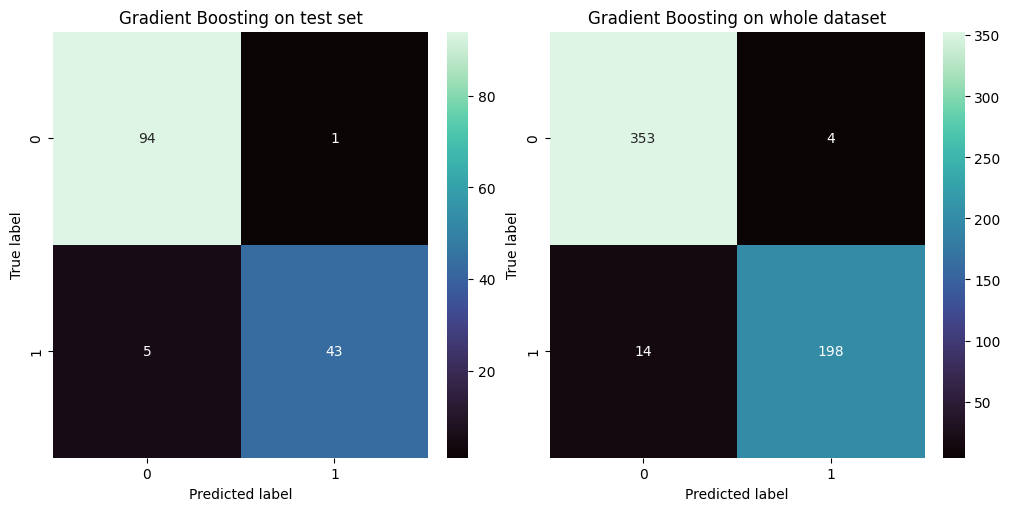

In [448]:
fig, ax =  plt.subplots(1, 2, constrained_layout=True, figsize=(10, 5))

c_matrix_gb_test = confusion_matrix(y_test, pred_y_gb)

# create the whole dataset which is in new order after randoming in the spliting part
pred_y_gb_train = gb_model.predict(x_normalized_train)
pred_y_gb_all = pred_y_gb_train
y_all = pd.concat([y_train, y_test])

for i in range (len(pred_y_svm)):
  pred_y_gb_all = np.append(pred_y_gb_all, pred_y_gb[i])

c_matrix_gb_all = confusion_matrix(y_all, pred_y_gb_all)

#plot
sns.heatmap(c_matrix_gb_test, annot=True, fmt='d', cmap = "mako", ax=ax[0])
ax[0].set_title('Gradient Boosting on test set')
ax[0].set_ylabel('True label')
ax[0].set_xlabel('Predicted label')

sns.heatmap(c_matrix_gb_all, annot=True, fmt='d', cmap = "mako", ax=ax[1])
ax[1].set_title('Gradient Boosting on whole dataset')
ax[1].set_ylabel('True label')
ax[1].set_xlabel('Predicted label')

plt.show()

#### Confusion Matrix of ***Ensemble - XGBoost*** on test set and whole dataset:

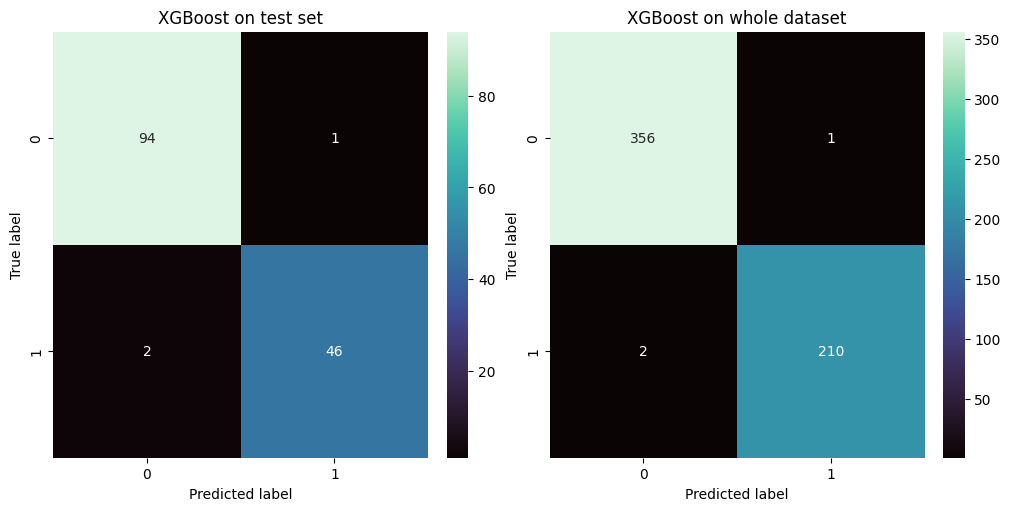

In [449]:
fig, ax =  plt.subplots(1, 2, constrained_layout=True, figsize=(10, 5))

c_matrix_xgb_test = confusion_matrix(y_test, pred_y_xgb)

# create the whole dataset which is in new order after randoming in the spliting part
pred_y_xgb_train = xgb_model.predict(x_normalized_train)
pred_y_xgb_all = pred_y_xgb_train
y_all = pd.concat([y_train, y_test])

for i in range (len(pred_y_svm)):
  pred_y_xgb_all = np.append(pred_y_xgb_all, pred_y_xgb[i])

c_matrix_xgb_all = confusion_matrix(y_all, pred_y_xgb_all)

#plot
sns.heatmap(c_matrix_xgb_test, annot=True, fmt='d', cmap = "mako", ax=ax[0])
ax[0].set_title('XGBoost on test set')
ax[0].set_ylabel('True label')
ax[0].set_xlabel('Predicted label')

sns.heatmap(c_matrix_xgb_all, annot=True, fmt='d', cmap = "mako", ax=ax[1])
ax[1].set_title('XGBoost on whole dataset')
ax[1].set_ylabel('True label')
ax[1].set_xlabel('Predicted label')

plt.show()

#### Confusion Matrix of ***Ensemble - Stacking*** on test set and whole dataset:

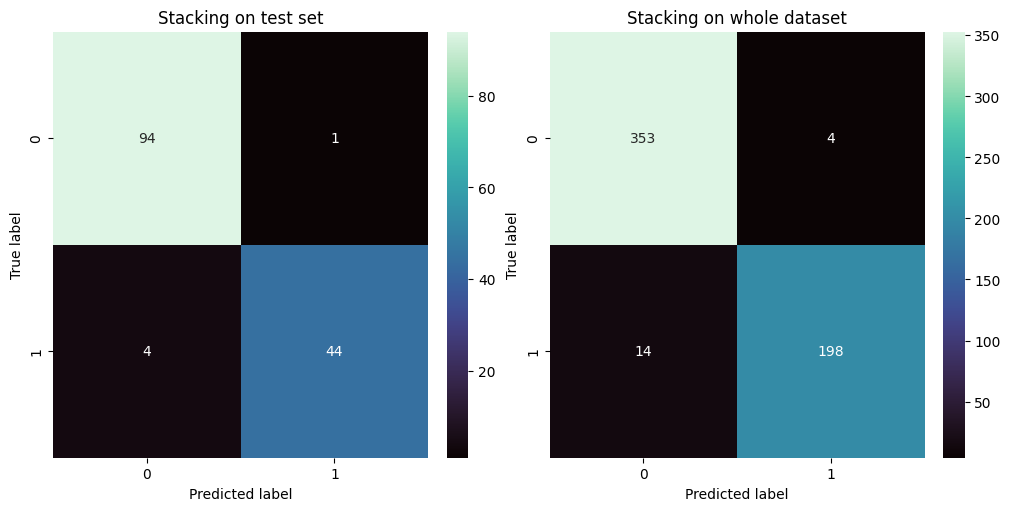

In [450]:
fig, ax =  plt.subplots(1, 2, constrained_layout=True, figsize=(10, 5))

c_matrix_stacking_test = confusion_matrix(y_test, pred_y_stacking)

# create the whole dataset which is in new order after randoming in the spliting part
pred_y_stacking_train = stacking_model.predict(x_normalized_train)
pred_y_stacking_all = pred_y_stacking_train
y_all = pd.concat([y_train, y_test])

for i in range (len(pred_y_svm)):
  pred_y_stacking_all = np.append(pred_y_stacking_all, pred_y_stacking[i])

c_matrix_stacking_all = confusion_matrix(y_all, pred_y_stacking_all)

#plot
sns.heatmap(c_matrix_stacking_test, annot=True, fmt='d', cmap = "mako", ax=ax[0])
ax[0].set_title('Stacking on test set')
ax[0].set_ylabel('True label')
ax[0].set_xlabel('Predicted label')

sns.heatmap(c_matrix_stacking_all, annot=True, fmt='d', cmap = "mako", ax=ax[1])
ax[1].set_title('Stacking on whole dataset')
ax[1].set_ylabel('True label')
ax[1].set_xlabel('Predicted label')

plt.show()

## **Conclusion**

In [459]:
compare = {"Model Name": ["Bagging with SVM", "AdaBoost", "Gradient Boosting", "XGBoost", "Stacking"],
           "Accuracy": [accuracy_score(y_test,pred_y_bagging), accuracy_score(y_test,pred_y_ada), accuracy_score(y_test,pred_y_gb),
                        accuracy_score(y_test,pred_y_xgb), accuracy_score(y_test,pred_y_stacking)],
           "FN": [confusion_matrix(y_test,pred_y_bagging)[1][0], confusion_matrix(y_test,pred_y_ada)[1][0], confusion_matrix(y_test,pred_y_gb)[1][0],
                        confusion_matrix(y_test,pred_y_xgb)[1][0], confusion_matrix(y_test,pred_y_stacking)[1][0]]
           }
model_compare = pd.concat([model_compare, pd.DataFrame(compare)])

In [462]:
model_compare

,Model Name,Accuracy,FN
0,SVM,0.958042,4
1,Logistic Regression,0.944056,4
2,Gaussian Naive Bayes,0.951049,5
3,Decision Tree,0.944056,7
4,Random Forest,0.958042,4
0,Bagging with SVM,0.958042,4
1,AdaBoost,0.958042,5
2,Gradient Boosting,0.958042,5
3,XGBoost,0.979021,2
4,Stacking,0.965035,4


<Axes: xlabel='Model Name'>

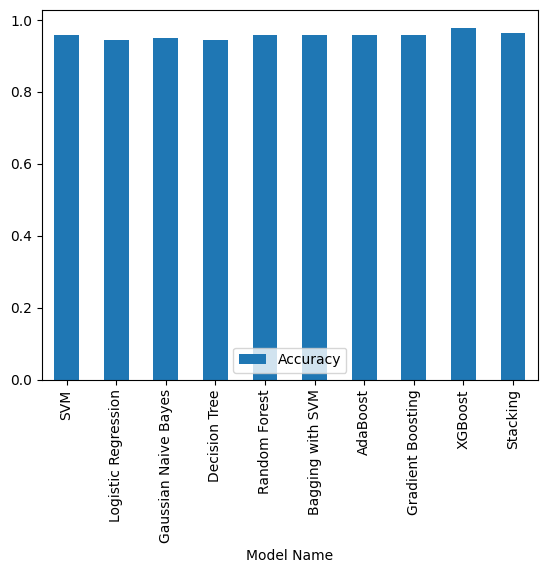

In [460]:
model_compare.plot.bar(x ="Model Name", y = "Accuracy")

<Axes: xlabel='Model Name'>

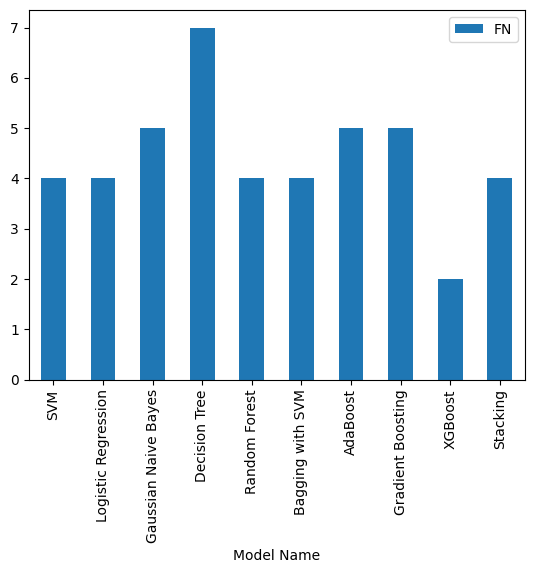

In [461]:
model_compare.plot.bar(x ="Model Name", y = "FN")

We will consider 2 factors which are accuracy and False Negative in the Confusion Matrix on the test set.
- **Accuracy:** Among 10 models, the ranking is:
1. XGBoost - 98%
2. Stacking - 97%
3. SVM, Random Forest, Bagging with SVM, and Gradient Boosting, AdaBoost - 96%
4. Gaussian Naive Bayes - 95%
5. Logistic Regression, Decision Tree - 94%
- **False Negative in the Confusion Matrix on the test set:** In the case of detecting whether a patient has breast cancer with 0 (no cancer) and 1 (has cancer), it is more dangerous to have a cancer patient with the wrong detection, so the models must keep FN in as small a number as possible. Therefore, if ranking the performance from highest to lowest based on FN:
1. XGBoost - 2
2. SVM, Random Forest, Logistic Regression, Bagging with SVM, Stacking - 4
3. Gaussian Naive Bayes, Gradient Boosting, AdaBoost - 5
4. Decision Tree - 7

Combining these 2 factors, we will have the best model is XGBoost.